<a href="https://colab.research.google.com/github/kubohenrique/Wine_prediction/blob/main/%5BPROJETO%5D_Previs%C3%A3o_de_Demanda_com_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**


---

# PROJETO DE PREVISÃO DE DEMANDA

<center><img width="30%" src=https://image.flaticon.com/icons/png/512/910/910368.png></center>

Decisões de negócios são muitas vezes tomadas em meio a situações internas e externas de riscos e incertezas. Justamente por ser o mundo corporativo um ambiente que muda constantemente, é que controllers lidam diretamente com diversas análises para apoiar gestores nas tomadas de decisão. Uma dessas análises é chamada de Previsão de Demanda.

Como o nome sugere, trata-se de uma projeção, ou seja, uma antecipação da demanda tomando diversos fatores como base (como fatores mercadológico, financeiro e econômico, por exemplo). Em uma cadeia de suprimentos essa previsão é tida como essencial para as tomadas de decisões estratégicas e para elaboração do planejamento estratégico, tático e operacional da empresa.

Além dos planejamentos Estratégico, Tático e Operacional, a Previsão de Demanda afeta diretamente no Planejamento Financeiro da empresa.

**O que é Previsão de Demanda?**

A previsão de Demanda proporciona às empresas informações valiosíssimas sobre os mercados em que operam, bem como sobre os mercados-alvo. Conhecida também como Estimativa de Demanda, está relacionada com prever o que acontecerá no futuro e que impacta diretamente a área produtiva da empresa.

O objetivo da Previsão de Demanda é entender qual será a demanda de uma empresa para que gestores estejam aptos a tomarem decisões precisas sobre preços, potencial de mercado e possibilidade de expansão. Organizações já estabelecidas utilizam a Projeção de Demanda para avaliar a viabilidade de entrar em um novo mercado. Caso perceba que a demanda por seu produto aumentará no futuro, a organização poderá melhor elaborar um plano de ação para planejar o início das operações no novo mercado, diminuindo, assim, possíveis riscos que afetarão sua competitividade e diminuirão sua lucratividade.

A Previsão de Demanda é também fundamental para a Gestão de Estoque. Ao não utilizar métodos de Projeção de Demanda a empresa corre o risco de ter excessos e/ou desperdícios, o que afetará os resultados financeiros organizacionais.

Fazer o prognóstico da demanda ajuda também a empresa a:

* Planejar o orçamento da produção, bem como a produção em si;
* Planejar a necessidade de mão de obra adicional;
* Realizar o orçamento de matéria-prima de maneira mais acurada;
* Fazer previsões financeiras;
* Planejar atividades de marketing;
* Evitar a subprodução ou a superprodução e
* Formular estratégias de preço.

Especificamente sobre o último item, queremos deixar uma dica. Se a demanda influencia no preço, o cliente é, por sua vez, muito influenciado pelo por ele. Não vamos aqui entrar no mérito da questão, pois sabemos que deve haver a relação preço x qualidade do produto, mas queremos nos atentar à formação do preço de venda. Isso porque empresas precisam ter certeza de que estão oferecendo a melhor oferta sem perder a lucratividade.

## O projeto

<center><img width="50%" src=https://as1.ftcdn.net/v2/jpg/02/61/68/74/1000_F_261687458_3ST9FeH7M8R93b0i3eKTUfmee9Lrjaad.jpg></center>

Esses dados são sintéticos, criados por mim para que possamos ter algo mais próximo com a realidade do projeto, mas algumas coisas precisamos levar em consideração:

A carta de vinhos, os produtos são reais, baseados na oferta real de um e-commerce de vinhos aqui no Brasil. Nomes, safras, e valores são 100% reais, convertidos pra Dólar para ter um apelo mais internacional.

O conjunto de dados de venda é baseado em uma competição no Kaggle. Lá, tínhamos 5 anos de vendas diárias, distribuídas por 10 lojas, com catálogo de 50 produtos. Eu alterei esse conjunto, e agora temos 3 anos de vendas diárias, distribuídos por 3 lojas com 219 produtos diferentes em estoque.

Como os dados são 100% sintéticos, ou seja, foram fabricados a partir de outro conjunto, tendo sido para a maioria dos itens 100% forjados, isso vai trazer alguns pontos para o projeto:

Não vai nos trazer grandes indicativos que refletem a realidade daquele tipo de vinho. Claro que será a realidade do conjunto, mas, por exemplo, às vezes podemos ter que no nosso conjunto os rosés são o tipo de vinho mais vendido, representando apenas menos de 10% do portfólio da empresa, o que não faria sentido. Na realidade, em pouquíssimas regiões do mundo os Rosés seriam os mais vendidos, e se fossem, não teriam uma representativdade tão baixa no portfólio.

Podem prejudicar a sazonalidade e intereferir com a previsibilidade dos dados, por terem sido preenchidos de forma não orgânica.

Outro ponto importante é que alguns dos vinhos no nosso conjunto de dados podem ter registro de vendas antes do seu lançamento. Por exemplo, em Janeiro de 2018 termos registro de vendas de um vinho 2019. Isso acontece, mais uma vez, devido ao nosso conjunto sintético.

Mais um detalhe que na realidade pode fazer parte de um projeto como esse, é a descontinuidade de um produto. A safra 2015 uma hora vai acabar, e não podemos prever 10 anos de venda de um produto limitado, o que acrescenta mais um desafio nesse projeto. Esse detalhe não será um problema para nós que vamos tentar prever um período curto, mas para um trabalho contínuo, os dados precisam ser revistos com frequência!

## 0.0 - Bibliotecas

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import logging

from fbprophet import Prophet
from statsmodels.tsa.stattools import adfuller

logging.getLogger().setLevel(logging.ERROR)
sns.set_style()

### 0.1 - Dados

Como explicado anteriormente, nós temos dois arquivos diferentes, um com o nosso portfólio de produtos, mostrando todas as nossas ofertas e outro com dados de vendas. Primeiro, vamos analisar os dados dos produtos para entender melhor o que temos nas nossas mãos.

In [62]:
df = pd.read_csv('https://raw.githubusercontent.com/rafaelnduarte/sigmoidal_data/master/products.csv')

In [63]:
df.head()

,item_id,name,producer,country,region,vintage,kind,price_brl,price_usd
0,1,Philipponnat Royale Reserve Brut,Philipponat,France,Champagne,NV,sparkling,339.60,58.75
1,2,Philipponnat Royale Reserve Rosé,Philipponat,France,Champagne,NV,rose sparkling,489.00,84.60
2,3,Philipponnat Cuvée 1522 Grand Cru Extra Brut,Philipponat,France,Champagne,2009,sparkling,789.00,136.51
3,4,Philipponnat Cuvée 1522 1er Cru Rosé,Philipponat,France,Champagne,2008,rose sparkling,899.40,155.61
4,5,Philipponnat Clos Des Goisses Brut,Philipponat,France,Champagne,2009,sparkling,"1,548.00",267.82


In [64]:
df.tail()

,item_id,name,producer,country,region,vintage,kind,price_brl,price_usd
214,215,Achaval-Ferrer Quimera,Achaval Ferrer,Argentina,Mendoza,2015,red,235.20,40.69
215,216,Achaval-Ferrer Finca Altamira,Achaval Ferrer,Argentina,Mendoza,2014,red,699.00,120.93
216,217,Achaval-Ferrer Finca Bella Vista,Achaval Ferrer,Argentina,Mendoza,2014,red,539.40,93.32
217,218,Achaval-Ferrer Finca Mirador,Achaval Ferrer,Argentina,Mendoza,2014,red,599.40,103.70
218,219,Achaval-Ferrer Blend De Fincas Edição Limitada,Achaval Ferrer,Argentina,Mendoza,2014,red,999.00,172.84


In [65]:
print('Número de linhas: {}'.format(df.shape[0]))
print('Número de colunas: {}'.format(df.shape[1]))

Número de linhas: 219
Número de colunas: 9


#### 0.1.1 - Dicionário de Variáveis

* item_id = Número de identificação do item
* name = Nome do vinho
* producer = Nome do Produtor do vinho
* country = País de origem do vinho
* vintage = Safra
* kind = Tipo do vinho
      Sparkling = Espumante
      Rose Sparkling = Espumante Rose
      White = Branco
      Rosé = Rosé
      Red = Tinto
* price_brl = Preço em reais
* price_usd = Preço em dólar americano

## 0.2 - Helper Functions

## 1.0 - Limpeza dos dados

Aqui começa a preparação dos dados para nossa análise.

De cara, podemos perceber que na variável preço, temos algumas vírgulas, que não vão ser bem interpretadas pelo Python. Para que possamos trabalhar melhor essa variável, e possamos transformá-la em float, vamos retirar essas vírgulas.

### 1.1 - Substituir as virgulas

In [66]:
df.replace(',', '', regex=True, inplace=True)
df.head()

,item_id,name,producer,country,region,vintage,kind,price_brl,price_usd
0,1,Philipponnat Royale Reserve Brut,Philipponat,France,Champagne,NV,sparkling,339.60,58.75
1,2,Philipponnat Royale Reserve Rosé,Philipponat,France,Champagne,NV,rose sparkling,489.00,84.60
2,3,Philipponnat Cuvée 1522 Grand Cru Extra Brut,Philipponat,France,Champagne,2009,sparkling,789.00,136.51
3,4,Philipponnat Cuvée 1522 1er Cru Rosé,Philipponat,France,Champagne,2008,rose sparkling,899.40,155.61
4,5,Philipponnat Clos Des Goisses Brut,Philipponat,France,Champagne,2009,sparkling,1548.00,267.82


### 1.2 - Dados Ausentes

In [67]:
df.isna().sum()

item_id      0
name         0
producer     0
country      0
region       0
vintage      0
kind         0
price_brl    0
price_usd    0
dtype: int64

### 1.3 - Tipos de dados

In [68]:
df.dtypes

item_id       int64
name         object
producer     object
country      object
region       object
vintage      object
kind         object
price_brl    object
price_usd    object
dtype: object

### 1.4 - Mudando os tipos de dados

Primeiro, vou transformar o `id` em string, para que o algoritmo que formos usar depois não tente associar a grandeza do número de id, e não leve isso em consideração. O id é somente para identificar os produtos, o vinho 1 não é melhor nem pior que o 219 levando em consideração o id.

Além disso, vamos converter para float os valores monetários.

In [69]:
df['item_id'] = df['item_id'].astype(str)
df['price_brl'] = pd.to_numeric(df['price_brl'])
df['price_usd'] = pd.to_numeric(df['price_usd'])

In [70]:
df.dtypes

item_id       object
name          object
producer      object
country       object
region        object
vintage       object
kind          object
price_brl    float64
price_usd    float64
dtype: object

Outra limpeza que faremos é mudar a variável `vintage`
, nas linhas onde está escrito NV (Non-Vintage) para 0, para que possamos mudar para um formato numérico.

In [71]:
df['vintage'].replace('NV', '0', regex=True, inplace=True)
df['vintage'] = pd.to_numeric(df['vintage'])

In [72]:
df.dtypes

item_id       object
name          object
producer      object
country       object
region        object
vintage        int64
kind          object
price_brl    float64
price_usd    float64
dtype: object

### 1.5 - Salvando os Dados Limpos

In [73]:
df.to_csv('produtos_clean.csv', index=0)

## 2.0 - AED ( Análise Exploratória dos Dados )

<center><img width="40%" src=https://image.freepik.com/vetores-gratis/ilustracao-do-conceito-de-planilhas_114360-736.jpg></center>

A finalidade da Análise Exploratória de Dados (AED) é
examinar os dados previamente à aplicação de qualquer
técnica estatística. Desta forma o analista consegue um
entendimento básico de seus dados e das relações existentes
entre as variáveis analisadas.
Após a coleta e a digitação de dados em um banco de dados
apropriado, o próximo passo é a análise descritiva. Esta etapa
é fundamental, pois uma análise descritiva detalhada permite
ao pesquisador familiarizar-se com os dados, organizá-los e
sintetizá-los de forma a obter as informações necessárias do
conjunto de dados para responder as questões que estão
sendo estudadas.

### 2.1 - Verificando a quantidade de produtores, países e safras

In [74]:
# verificando a quantidade de produtores
print("Quantidade de Produtores na carta de vinhos: ", (len(df.producer.value_counts())))
print("Quantidade de Países na carta de vinhos: ", (len(df.country.value_counts())))
print("Quantidade de Safras na carta de vinhos: ", (len(df.vintage.value_counts())),"\n")

df.producer.value_counts()

Quantidade de Produtores na carta de vinhos:  58
Quantidade de Países na carta de vinhos:  6
Quantidade de Safras na carta de vinhos:  17 



Domaine Ponsot                                    12
La Chablisienne                                   10
Domaine Matrot                                     9
Pêra-Grave                                         8
Olivier Riviere                                    8
Achaval Ferrer                                     8
Casanova di Neri                                   8
Eric Texier                                        7
Domaine Pascal Prunier-Bonheur                     7
Aalto                                              5
Philipponat                                        5
Luis Seabra Vinhos                                 5
Domaine Alain Chavy                                5
Sandrone                                           5
Domaine Michel Niellon                             5
Domaine de Fontbonau                               5
Domaine Tessier                                    5
Elian da Ros                                       4
Arinzano                                      

### 2.1 - Verificando as safras das cartas de vinho

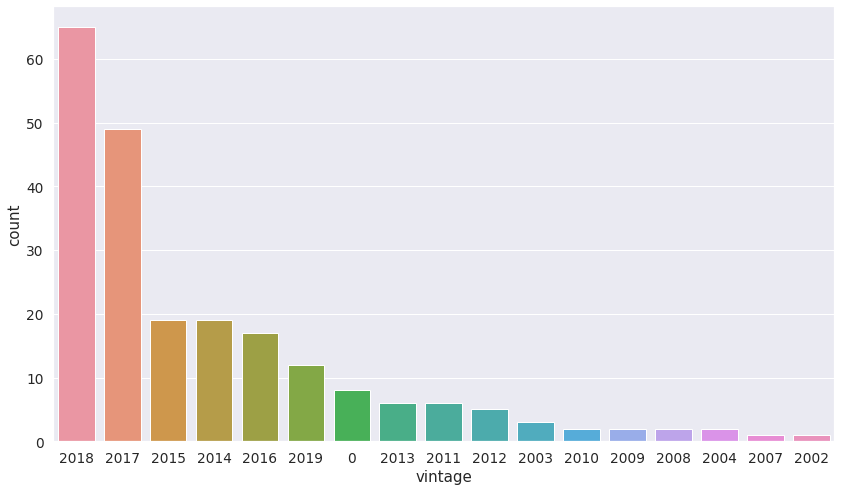

In [75]:
fig, ax = plt.subplots(figsize = (14,8))
sns.countplot(x = df['vintage'], order=df['vintage'].value_counts().index)
plt.show()

### 2.2 - Preço dos vinhos

In [76]:
print(df.price_usd.describe(), "\n")
print("O vinho mais caro custa: USD $",df.price_usd.max())
print("O vinho mais barato custa: USD $", df.price_usd.min())
print("A média de preço dos vinhos é de: USD $", df.price_usd.mean())

count     219.000000
mean      167.407808
std       243.873780
min         9.130000
25%        45.725000
50%        88.130000
75%       164.220000
max      1901.730000
Name: price_usd, dtype: float64 

O vinho mais caro custa: USD $ 1901.73
O vinho mais barato custa: USD $ 9.13
A média de preço dos vinhos é de: USD $ 167.40780821917815


Vamos verificar agora os preços médios dos vinhos por região de produção:

In [77]:
grouped_df = df.groupby("region")

mean_df = grouped_df.mean()

mean_df = mean_df.reset_index()

# print(round(mean_df,2))
round(mean_df.sort_values('price_usd', ascending=False),2)

,region,vintage,price_brl,price_usd
8,Maipo,2017.00,3594.00,621.80
16,Ribera del Duero,2018.00,2121.60,367.06
3,Burgundy,2016.91,1351.17,233.77
2,Bordeaux,2013.43,1222.61,211.52
12,Piedmont,2015.20,981.00,169.73
5,Champagne,1116.89,915.33,158.36
19,Toscana,2015.88,877.28,151.78
7,Loire Valley,2018.20,756.48,130.88
1,Alsace,2008.00,459.00,79.41
9,Mendoza,2015.38,435.82,75.40


### 2.3 - Vinhos por região e países produtores

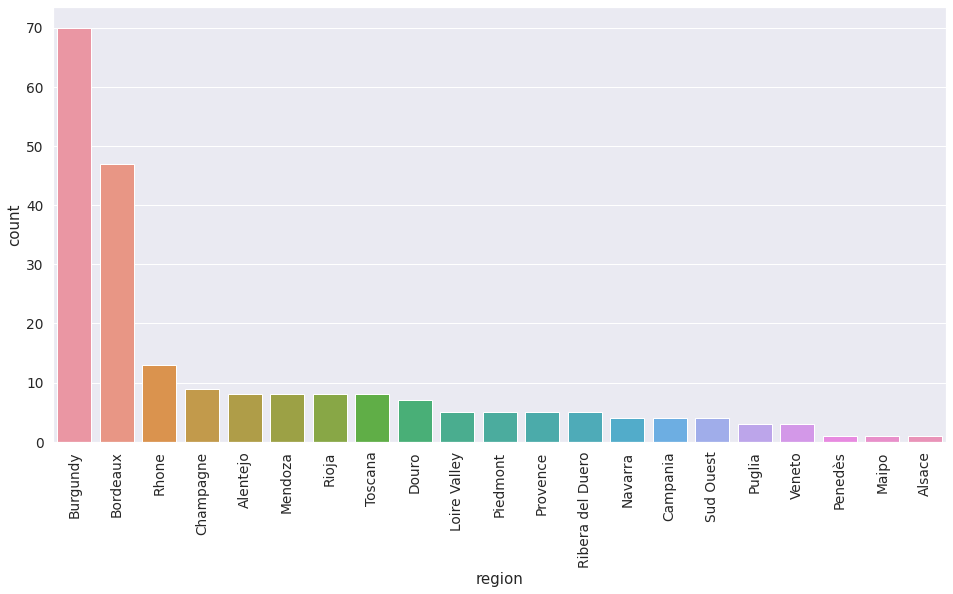

In [78]:
# regiões visualizadas
f, ax = plt.subplots(figsize=(16, 8))
sns.countplot(x=df.region, order = df.region.value_counts().index)
plt.xticks(rotation=90)
plt.show();

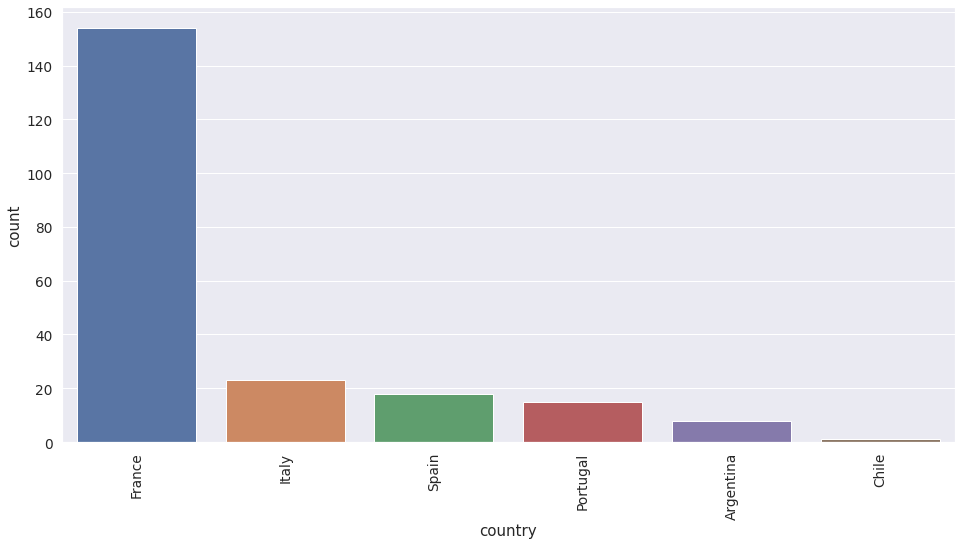

In [79]:
# países visualizados
f, ax = plt.subplots(figsize=(16, 8))
sns.countplot(x=df.country, order=df.country.value_counts().index)
plt.xticks(rotation=90)
plt.show();

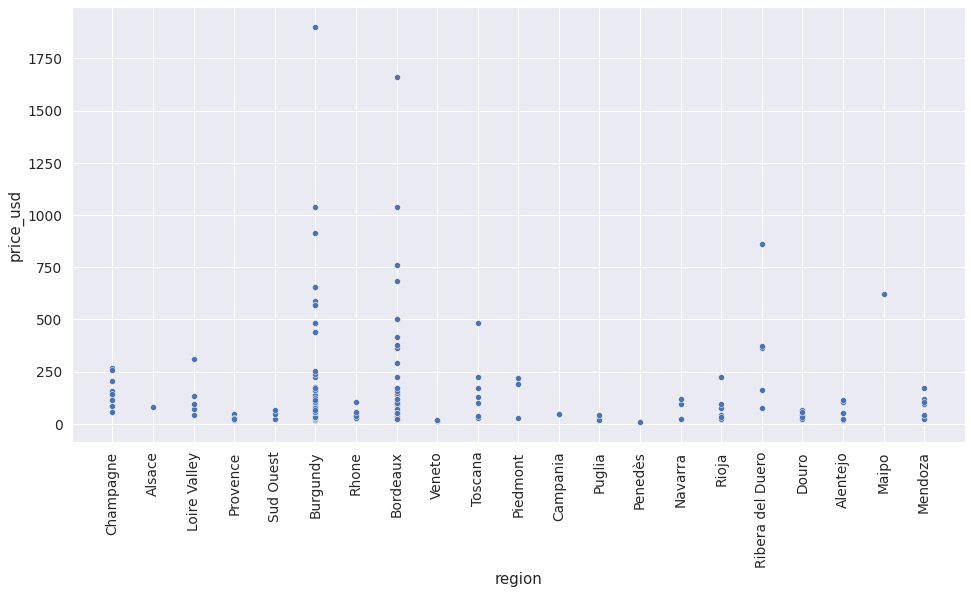

In [80]:
# preço  região
f, ax = plt.subplots(figsize=(16, 8))
sns.scatterplot(x=df.region, y=df.price_usd)
plt.xticks(rotation=90)
plt.show();

Com essa análise dos dados das cartas de vinho, podemos tirar algumas informações:

* Os vinhos mais numerosos na carta de vinhos são as de safras mais novas;
* A carta possui mais vinhos da França, especialmente das regiões de *Burgundy* e *Bordeaux*.
* Não à toa, os vinhos mais caros são dessas regiões.

## 3.0 - Dados de Vendas

Agora que entendemos melhor o problema, e o nosso estoque, é hora de darmos uma olhada nos dados de vendas.

<center><img alt="Vaga" width="50%" src="https://images.homify.com/c_fill,f_auto,q_0,w_740/v1554394412/p/photo/image/2996199/56670184_1866383383467011_2693276186326335488_n.jpg"></center>

Como dito anteriormente, esse conjunto de dados foi criado tendo como base um conjunto similar que foi utilizado em uma competição do Kaggle. O conjunto original, tinha 5 anos de registros diários de vendas, dsitribuídos em 10 lojas, sobre 50 protudos.

Nosso conjunto foi criado para ter 3 anos de vendas, distribuídos por 3 lojas com um catálogo de 219 produtos.

Lembrando que podemos encontrar problemas que não necessariamente aconteceriam no mundo real, e podem ser causados pela natureza dos nossos dados. De qualquer forma, a intenção é estruturar o problema, e apresentar um projeto relevante, mostrando nosso melhor trabalho com os dados que nos foram disponibilizados.

Uma empresa real, teria dados muito mais completos, incluindo dados sobre os consumidores, de onde poderíamos tirar ainda mais insights, trabalhar com sistemas de recomendação, segmentação de clientes, etc.

Aproveitando pra incrementar, fiz uma junção dos dois conjuntos, para que possamos ter uma ideia melhor do contexto das vendas. A partir disso, conseguimos tirar ainda mais insights desse conjunto de dados.

Com isso em mente, vamos dar uma olhada nos dados.

### 3.1 - Junção dos Dados

In [81]:
# Dados das vendas
store = pd.read_csv('https://raw.githubusercontent.com/rafaelnduarte/sigmoidal_data/master/sales-clean.csv')

store.rename(columns = {'item': 'item_id'}, inplace=True)
store.item_id = store.item_id.astype(str)

store = df.merge(store, on='item_id', how='right')

In [82]:
store.head()

,item_id,name,producer,country,region,vintage,kind,price_brl,price_usd,date,store,sales
0,1,Philipponnat Royale Reserve Brut,Philipponat,France,Champagne,0,sparkling,339.6,58.75,2018-01-01,1,13
1,1,Philipponnat Royale Reserve Brut,Philipponat,France,Champagne,0,sparkling,339.6,58.75,2018-01-02,1,11
2,1,Philipponnat Royale Reserve Brut,Philipponat,France,Champagne,0,sparkling,339.6,58.75,2018-01-03,1,14
3,1,Philipponnat Royale Reserve Brut,Philipponat,France,Champagne,0,sparkling,339.6,58.75,2018-01-04,1,13
4,1,Philipponnat Royale Reserve Brut,Philipponat,France,Champagne,0,sparkling,339.6,58.75,2018-01-05,1,10


In [83]:
store.dtypes

item_id       object
name          object
producer      object
country       object
region        object
vintage        int64
kind          object
price_brl    float64
price_usd    float64
date          object
store          int64
sales          int64
dtype: object

Percebemos que a variável `date` está como um objeto, mas iremos usar o formato datetime

In [84]:
store['date'] = pd.to_datetime(store['date'])
store.index = store['date']
store.drop('date', axis=1, inplace=True)


In [85]:
store.head()

,item_id,name,producer,country,region,vintage,kind,price_brl,price_usd,store,sales
date,,,,,,,,,,,
2018-01-01,1,Philipponnat Royale Reserve Brut,Philipponat,France,Champagne,0,sparkling,339.6,58.75,1,13
2018-01-02,1,Philipponnat Royale Reserve Brut,Philipponat,France,Champagne,0,sparkling,339.6,58.75,1,11
2018-01-03,1,Philipponnat Royale Reserve Brut,Philipponat,France,Champagne,0,sparkling,339.6,58.75,1,14
2018-01-04,1,Philipponnat Royale Reserve Brut,Philipponat,France,Champagne,0,sparkling,339.6,58.75,1,13
2018-01-05,1,Philipponnat Royale Reserve Brut,Philipponat,France,Champagne,0,sparkling,339.6,58.75,1,10


* Vamos verificar o tamanho dos dados juntados:


In [86]:
print('Número de linhas: {}'.format(store.shape[0]))
print('Número de colunas: {}'.format(store.shape[1]))

Número de linhas: 720071
Número de colunas: 11


In [87]:
store.tail()

,item_id,name,producer,country,region,vintage,kind,price_brl,price_usd,store,sales
date,,,,,,,,,,,
2020-12-27,219,Achaval-Ferrer Blend De Fincas Edição Limitada,Achaval Ferrer,Argentina,Mendoza,2014,red,999.0,172.84,3,71
2020-12-28,219,Achaval-Ferrer Blend De Fincas Edição Limitada,Achaval Ferrer,Argentina,Mendoza,2014,red,999.0,172.84,3,28
2020-12-29,219,Achaval-Ferrer Blend De Fincas Edição Limitada,Achaval Ferrer,Argentina,Mendoza,2014,red,999.0,172.84,3,75
2020-12-30,219,Achaval-Ferrer Blend De Fincas Edição Limitada,Achaval Ferrer,Argentina,Mendoza,2014,red,999.0,172.84,3,135
2020-12-31,219,Achaval-Ferrer Blend De Fincas Edição Limitada,Achaval Ferrer,Argentina,Mendoza,2014,red,999.0,172.84,3,91


* Os dados de vendão são de 01/01/2018 até 31/12/2020.

In [88]:
# distribuição estatística das vendas
round(store.describe(), 2).T

,count,mean,std,min,25%,50%,75%,max
vintage,720071.0,1942.18,378.19,0.00,2014.00,2017.00,2018.00,2019.00
price_brl,720071.0,967.62,1406.37,52.80,259.20,509.40,949.20,10992.00
price_usd,720071.0,167.41,243.32,9.13,44.84,88.13,164.22,1901.73
store,720071.0,2.00,0.82,1.00,1.00,2.00,3.00,3.00
sales,720071.0,70.59,41.36,1.00,35.00,67.00,104.00,196.00


### 3.2 - AED e Feature Engineering 

Agora que temos uma ideia, um panorama desse conjunto de dados, vamos criar uma cópia do conjunto e algumas novas variáveis que possam nos ajudar a explorar esse conjunto.

Lembrando que estamos lidando com uma Série Temporal existem vários insights que podemos tirar dos dados nesse sentido.

In [89]:
# criando uma cópia do dataset
df_clean = store.copy()

# criando mais features para a análise temporal
df_clean["Year"] = df_clean.index.year
df_clean["Quarter"] = df_clean.index.quarter
df_clean["Month"] = df_clean.index.month
df_clean["Week"] = df_clean.index.week
df_clean["Weekday"] = df_clean.index.weekday
df_clean["Day"] = df_clean.index.day
df_clean["Dayofyear"] = df_clean.index.dayofyear
df_clean["Date"] = pd.DatetimeIndex(df_clean.index).date
df_clean.drop(df_clean[df_clean.Year == 2016].index, axis=0, inplace=True)

# checando as novas features
df_clean.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning:

weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)



,item_id,name,producer,country,region,vintage,kind,price_brl,price_usd,store,sales,Year,Quarter,Month,Week,Weekday,Day,Dayofyear,Date
date,,,,,,,,,,,,,,,,,,,
2018-01-01,1,Philipponnat Royale Reserve Brut,Philipponat,France,Champagne,0,sparkling,339.6,58.75,1,13,2018,1,1,1,0,1,1,2018-01-01
2018-01-02,1,Philipponnat Royale Reserve Brut,Philipponat,France,Champagne,0,sparkling,339.6,58.75,1,11,2018,1,1,1,1,2,2,2018-01-02
2018-01-03,1,Philipponnat Royale Reserve Brut,Philipponat,France,Champagne,0,sparkling,339.6,58.75,1,14,2018,1,1,1,2,3,3,2018-01-03
2018-01-04,1,Philipponnat Royale Reserve Brut,Philipponat,France,Champagne,0,sparkling,339.6,58.75,1,13,2018,1,1,1,3,4,4,2018-01-04
2018-01-05,1,Philipponnat Royale Reserve Brut,Philipponat,France,Champagne,0,sparkling,339.6,58.75,1,10,2018,1,1,1,4,5,5,2018-01-05


Como temos 7 dias na semana, e a contagem começa do 0, temos dias do 0 ao 6. Começando nossa contagem na segunda, significa que os dias 5 e 6 seriam Sábado e Domingo. Com isso, vamos criar uma variável Weekend para que possamos mensurar as vendas ao longo dos dias da semana.

In [90]:
# convertendo as variáveis em 0 ou 1
df_clean['Weekend'] = 0
df_clean.loc[(df_clean.Weekday == 5) | (df_clean.Weekday == 6), 'Weekend'] = 1

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



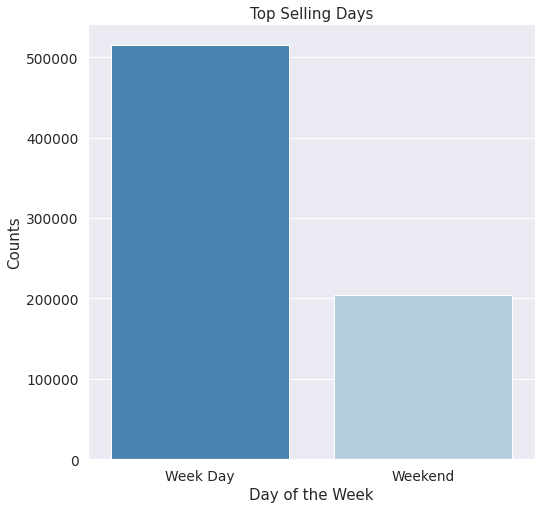

In [91]:
# checando valores por dia da semana
weekend_counts = df_clean.Weekend.value_counts().sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(8,8))
sns.barplot(weekend_counts.index, weekend_counts.values, palette="Blues_r")
plt.ylabel("Counts")
plt.xlabel("Day of the Week")
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = 'Weekend'
labels[0] = 'Week Day'
ax.set_xticklabels(labels)
plt.title("Top Selling Days");

Acima, estamos somente conferindo a proporção.

Abaixo, temos outra variável importante que pode nos ajudar bastante nessa busca. A nossa coluna sales nos dá a quantidade de itens vendidos, daquele produto, naquela loja, naquele dia. Como temos também o preço de cada produto, nós conseguimos fazer uma variável que nos diga a quantidade de dinheiro entrando para esse produto, nessa loja, nesse dia.

Para isso, criaremos uma nova coluna chamada amount_spent (Quantia Gasta) multiplicando a quantidade de itens vendidos pelo preço de cada item.

In [92]:
# criando a variável amount_spent
df_clean['amount_spent'] = df_clean['price_usd'] * df_clean['sales']
df_clean.head()

,item_id,name,producer,country,region,vintage,kind,price_brl,price_usd,store,sales,Year,Quarter,Month,Week,Weekday,Day,Dayofyear,Date,Weekend,amount_spent
date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,1,Philipponnat Royale Reserve Brut,Philipponat,France,Champagne,0,sparkling,339.6,58.75,1,13,2018,1,1,1,0,1,1,2018-01-01,0,763.75
2018-01-02,1,Philipponnat Royale Reserve Brut,Philipponat,France,Champagne,0,sparkling,339.6,58.75,1,11,2018,1,1,1,1,2,2,2018-01-02,0,646.25
2018-01-03,1,Philipponnat Royale Reserve Brut,Philipponat,France,Champagne,0,sparkling,339.6,58.75,1,14,2018,1,1,1,2,3,3,2018-01-03,0,822.50
2018-01-04,1,Philipponnat Royale Reserve Brut,Philipponat,France,Champagne,0,sparkling,339.6,58.75,1,13,2018,1,1,1,3,4,4,2018-01-04,0,763.75
2018-01-05,1,Philipponnat Royale Reserve Brut,Philipponat,France,Champagne,0,sparkling,339.6,58.75,1,10,2018,1,1,1,4,5,5,2018-01-05,0,587.50


Abaixo, podemos ver a distribuição estatística das variáveis de venda. De um lado, temos a venda por volume de produtos, e a outra em receita.

Aqui podemos ver que o pior dia desse período viu apenas uma venda, representando um valor monetário de USD $9.13.

Já o melhor dia viu 196 garrafas vendidas, somando um valor de USD $285.259,50.

A média é de por volta de 70 unidades por dia, e um valor de USD $12.138,10.

In [93]:
# distribuição estatística das variáveis de venda
round(df_clean.loc[:, ["sales", "amount_spent"]].describe(),2)

,sales,amount_spent
count,719922.00,719922.00
mean,70.59,12138.10
std,41.36,22349.80
min,1.00,9.13
25%,35.00,2253.79
50%,67.00,5051.26
75%,104.00,11428.30
max,196.00,285259.50


Mesmo com essa quantidade de dados, ainda não tiramos insights realmente significativos, que podem de fato ajudar a empresa a entender melhor seua demanda, e entender como ela pode otimizar o estoque, tanto em quantidade de itens quanto em oferta.

Aqui, vamos focar na parte de melhorar a oferta por um momento, analisando as regiões que mais vendem, levando em consideração vendas em volume e vendas em valor monetário.

É importante fazermos essa separação, pois podemos por exemplo, vender 10 garrafas por dia de um vinho de USD 10.00 e uma por semana de um vinho de USD 700.00. Em valores de rendimento, talvez sejam equivalentes, mas e se levarmos em conta rotatividade? Qual é mais relevante? Tem diferença? Qual vai dar mais trabalho no estoque? Como podemos vender mais da de USD 700.00? Dá pra vender mais ainda da de USD 10.00?

Essas são perguntas que podemos começar a responder com essas análises.

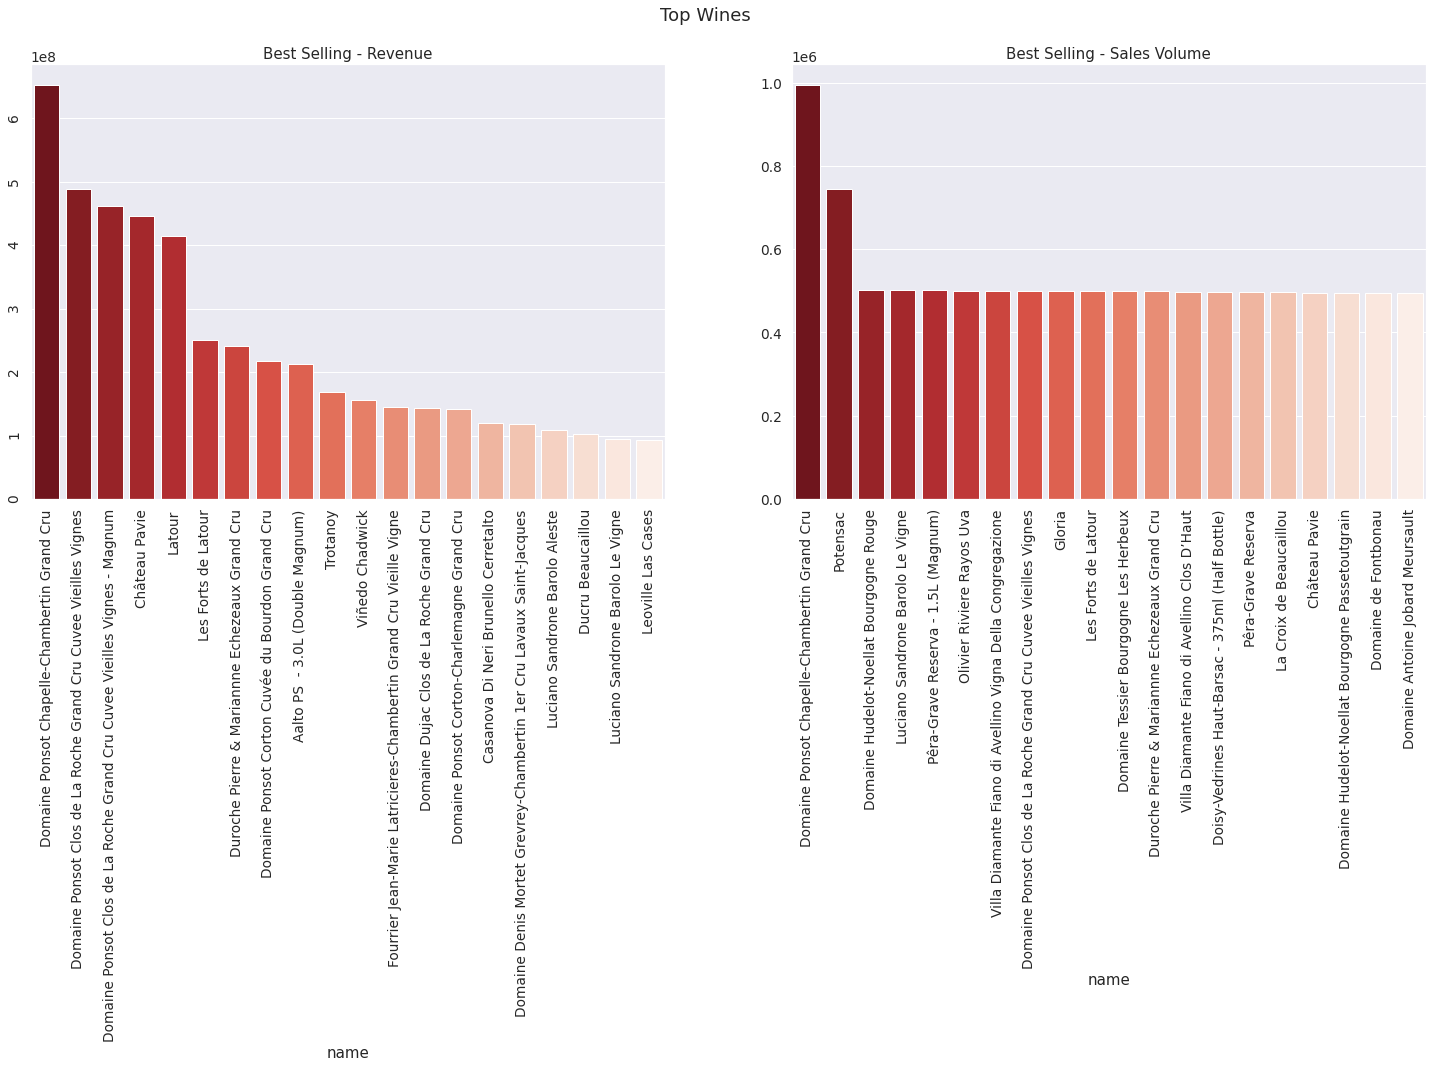

In [94]:
# visualizando os Top Sellers
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (25,8))
fig.suptitle('Top Wines')

#ax[0]
top_wines = df_clean.groupby('name')['amount_spent'].sum().sort_values(ascending=False).iloc[0:20]
sns.barplot(x=top_wines.index, y=top_wines.values, palette="Reds_r", ax=ax[0])
ax[0].tick_params(labelrotation=90)
ax[0].set_title('Best Selling - Revenue')

#ax[1]
top_sales = df_clean.groupby('name')['sales'].sum().sort_values(ascending=False).iloc[0:20]
sns.barplot(x=top_sales.index, y=top_sales.values, palette="Reds_r")
plt.xticks(rotation=90)
ax[1].set_title('Best Selling - Sales Volume')

plt.show()

Aqui temos um efeito muito interessante, onde o nosso vinho que mais traz receita também é o mais caro. Mas o segundo que mais gera faturamento é o **oitavo** em volume de vendas!

Se olharmos os vinhos do Domaine Ponsot vamos reparar preços bem elevados. Na verdade, são os vinhos mais caros da carta!

Além disso, esse é o produtor que tem mais rótulos disponíveis.

Veja abaixo:

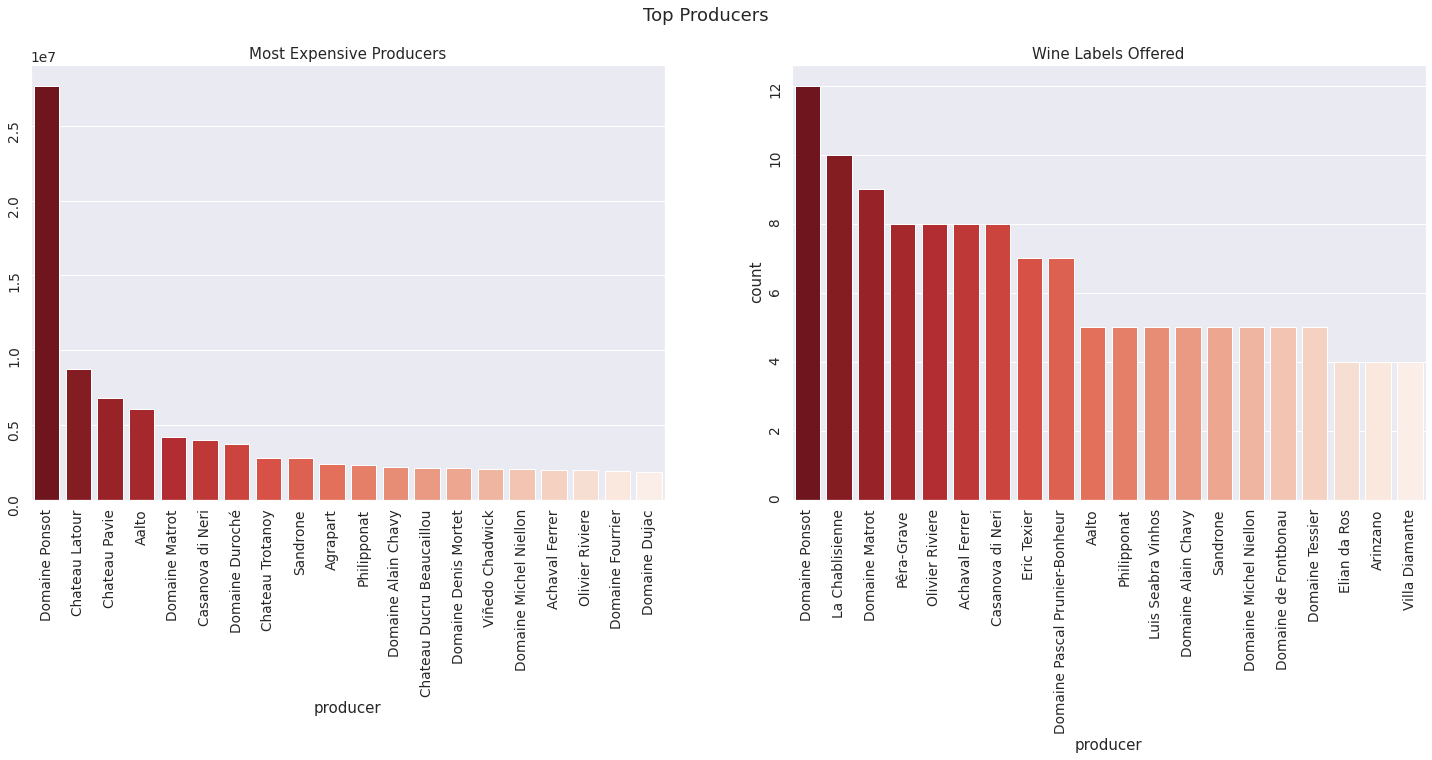

In [95]:
# top produtores
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (25,8))
fig.suptitle('Top Producers')

# produtor por preço
prod = df_clean.groupby('producer')['price_usd'].sum().sort_values(ascending=False).iloc[0:20]
sns.barplot(x= prod.index, y= prod.values, palette="Reds_r", ax=ax[0])
plt.ylabel("Amount Spent")
plt.xticks(rotation=90);
ax[0].tick_params(labelrotation=90)
ax[0].set_title('Most Expensive Producers')

# ofertas por produtor
sns.countplot(x=df.producer, order = df.producer.value_counts().nlargest(20).index, palette='Reds_r', ax=ax[1])
plt.xticks(rotation=90)
ax[1].tick_params(labelrotation=90)
ax[1].set_title('Wine Labels Offered')

plt.show()

Ainda analisando os produtores, podemos ver que o Domaine Ponsot realmente é o carro chefe da casa, não só em receita mas também em volume de vendas.

Que tipos de estratégias poderíamos traçar com isso me mente, tanto para o estoque quanto para o direcionamento da carta?

* Buscar mais produtores na região onde Ponsot tem seus vinhedos, trabalhando uma filosofia parecida.
* Vinhos de outras regiões que tragam o "mesmo estilo".
* Trazer mais vinhos do Ponsot, talvez vinhos mais de entrada.
* Trazer outras experiências deesse produtor (Kits de Degustação Vertical e/ou Horizontal)

Entre outros.

Além de entender a oferta dos vinhos por produtor, precisamos entender também como estão as vendas para cada produtor. Isso também nos dá um estilo preferido pelos nossos consumidores. Isso é importante pois podemos usar dados de compras dos clientes (que não temos para esse projeto) para segmentar nossos clientes por estilo de vinho parecidos, criar ofertas para esse público específico.

Por exemplo, se um cliente gosta de vinhos encorpados de Bordeaux e amadeirados de Rioja, pode não fazer sentido oferer a ele um kit de Beaujolais e Rosés. Mas talvez possamos oferecer um vinho argentino que tenha um caráter interessante. Não precisamos de uma oferta direta desse vinho, mas às vezes um kit com 1 vinho que sabemos que esse grupo gosta com esse para descobrirem. Dessa forma os clientes exploram a carta, e podem continuar comprando aquele determinado estilo, e começar a comprar um novo estilo e/ou novos rótulos.

Vamos ver o que conseguimos descobrir.

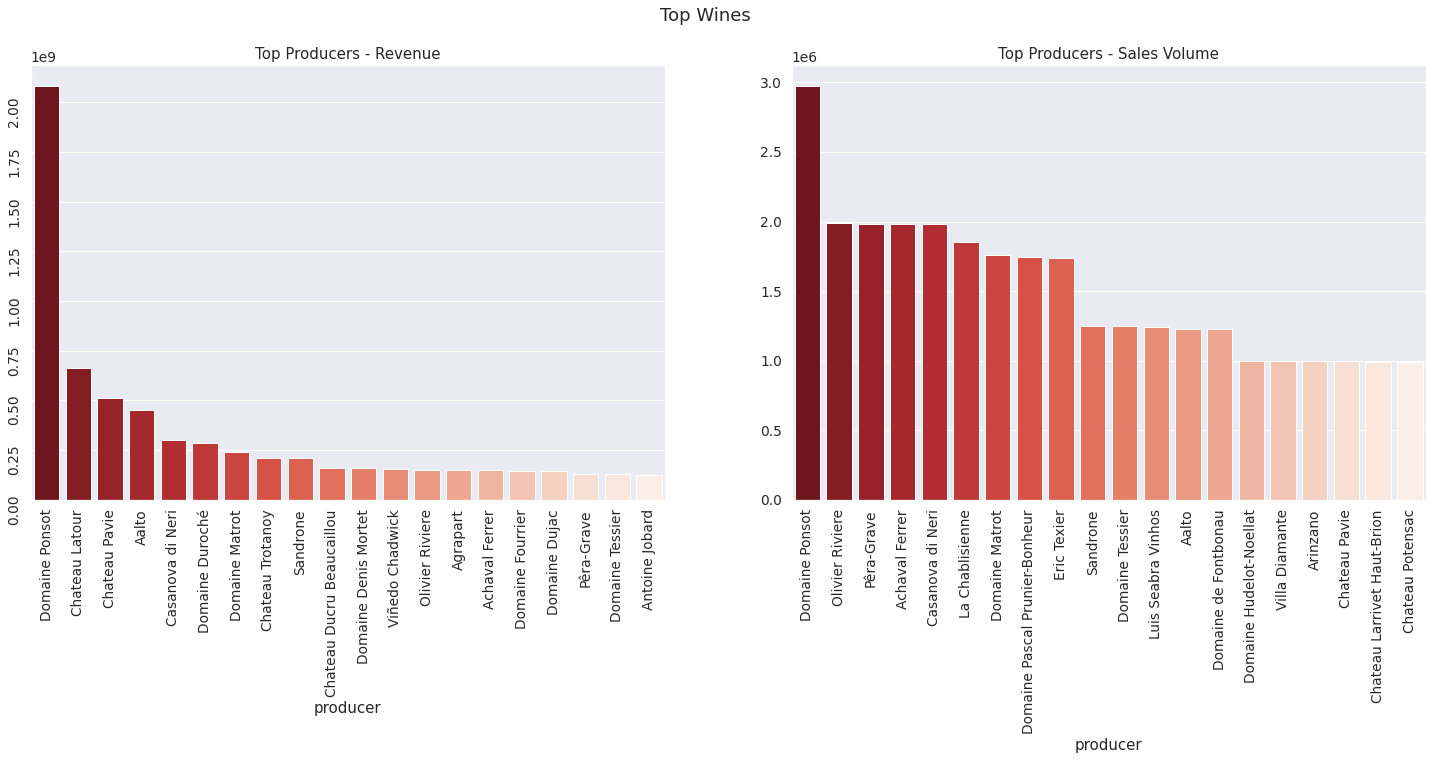

In [96]:
# visualizando os Top Sellers
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (25,8))
fig.suptitle('Top Wines')

#ax[0]
top_wines = df_clean.groupby('producer')['amount_spent'].sum().sort_values(ascending=False).iloc[0:20]
sns.barplot(x=top_wines.index, y=top_wines.values, palette="Reds_r", ax=ax[0])
ax[0].tick_params(labelrotation=90)
ax[0].set_title('Top Producers - Revenue')

#ax[1]
top_sales = df_clean.groupby('producer')['sales'].sum().sort_values(ascending=False).iloc[0:20]
sns.barplot(x=top_sales.index, y=top_sales.values, palette="Reds_r")
plt.xticks(rotation=90)
ax[1].set_title('Top Producers - Sales Volume')

plt.show()

Aqui podemos mais uma vez ver o domínio do Domaine Ponsot, mas também me chama atenção que o Chateau Latour, por exemplo, esteja na segunda posição de mais receita e não aparece no Top 20 de volume de vendas. Podemos conferir também que temos poucas ofertas desse produtor, e os rótulos ofertados tem valor elevado. Será que há alguma correlação entre o preço e as vendas?

Na Matriz de Correlação abaixo podemos ver que existe uma forte correlação positiva entre as variáveis de preço e quantia gasta, o que é óbvio, pois quanto mais caro o produto maior será a quantidade de dinheiro usado para a transação.

Não encontramos correlação relevante entre volume de vendas e preço. Isso indica que o preço não está sendo um fator decisivo nas vendas.

O que nos leva a concluir que o fato do Chateau Latour estar entre os que dão mais receitas se dá somente pelo fato de ser um dos vinhos mais caros da lista.

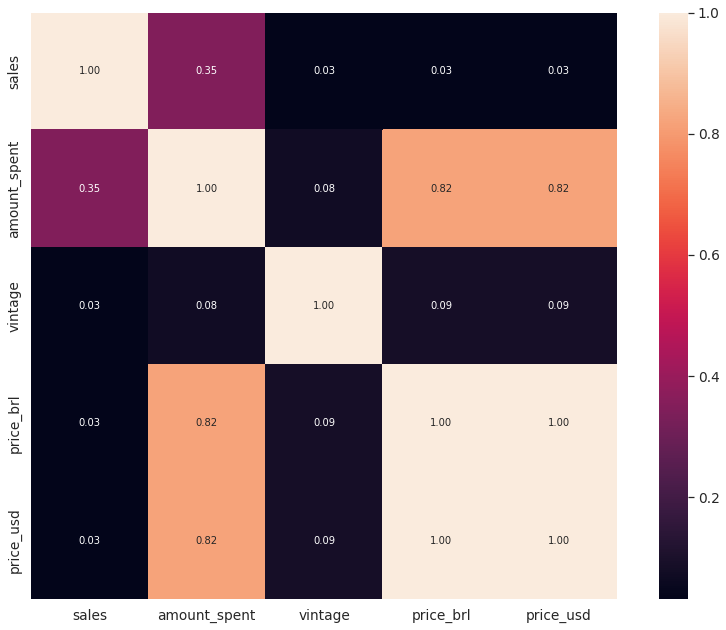

In [97]:
# creating the correlation matrix
corr = df_clean.corr()

# finding the most correlated variables
cols = corr.nlargest(5, 'sales')['sales'].index
cm = np.corrcoef(df_clean[cols].values.T)

# plotting the heatmap
f, ax = plt.subplots(figsize=(12, 9))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.tight_layout()

Olhando novamente a lista de vinhos mais caros da lista, nós podemos encontrar 3 vinhos do Chateau Latour, mas nenhum deles está na lista de best sellers.

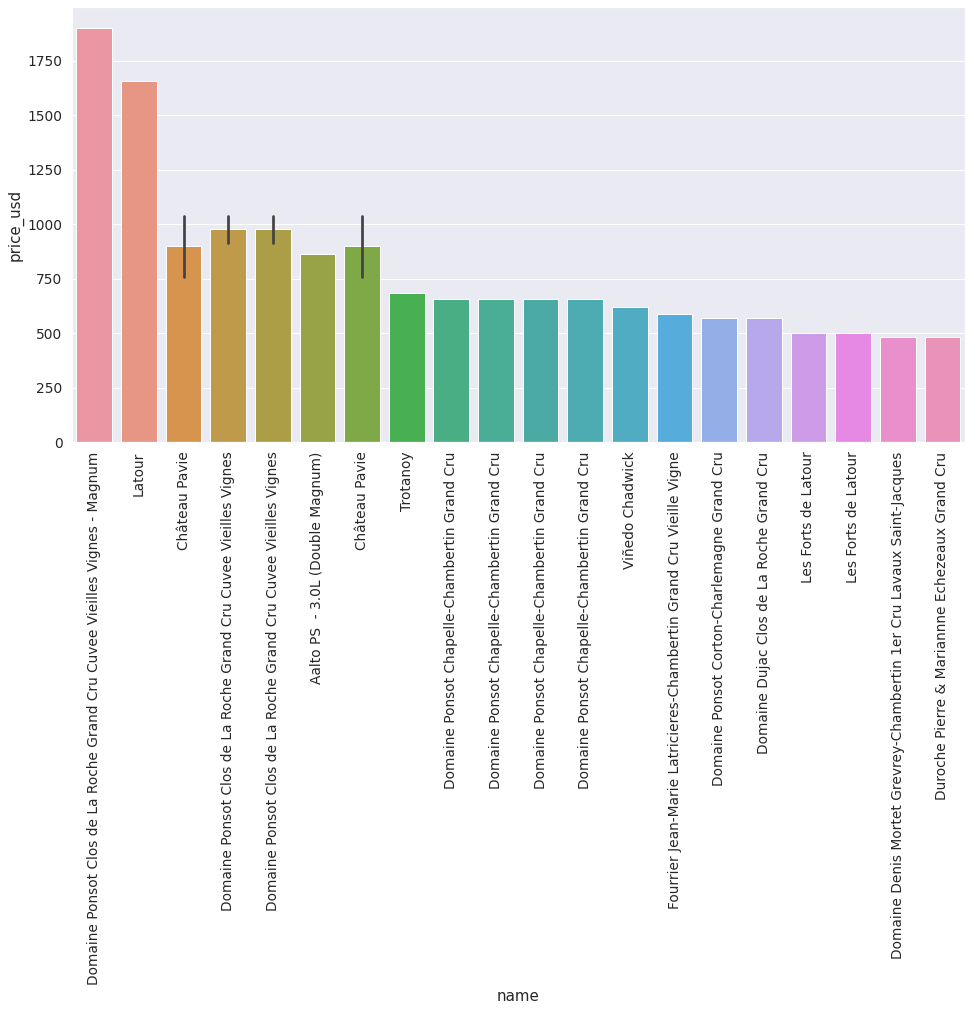

In [98]:
f, ax = plt.subplots(figsize=(16, 8))
sns.barplot(x=df.name, y=df.price_usd, order=df.sort_values('price_usd', ascending=False).name.iloc[0:20])
plt.xticks(rotation=90)
plt.show();

Também podemos dar uma olhada em como as regiões estão indo em relação às vendas.

Abaixo, temos a quantidade de rótulos disponível por região, e as regiões que mais vendem em relação a volume de vendas.

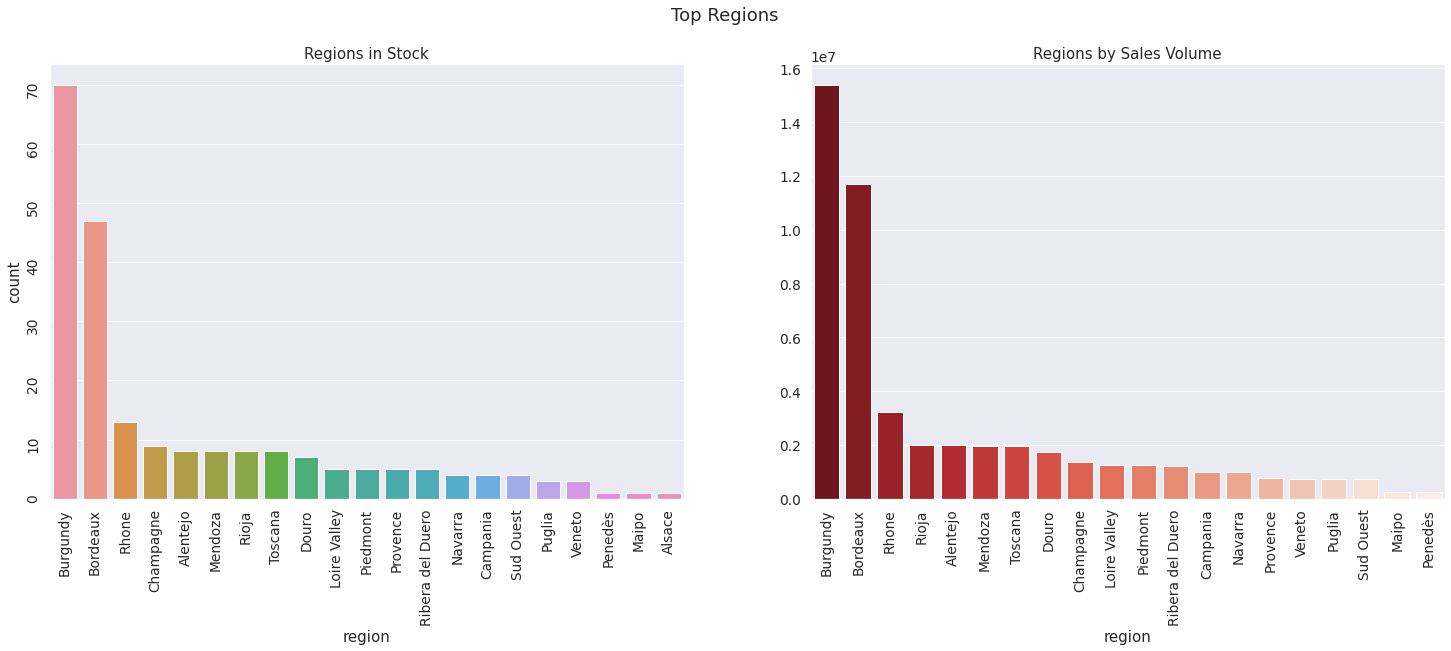

In [99]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (25,8))
fig.suptitle('Top Regions')

sns.countplot(x=df.region, order = df.region.value_counts().index, ax=ax[0])
ax[0].tick_params(labelrotation=90)
ax[0].set_title('Regions in Stock')

region = df_clean.groupby('region')['sales'].sum().sort_values(ascending=False).iloc[0:20]
sns.barplot(x=region.index, y=region.values, palette="Reds_r", ax=ax[1])
plt.xticks(rotation=90)
ax[1].set_title('Regions by Sales Volume')

plt.show()

Aqui vemos que as 3 principais regiões ofertadas são as que mais vendem. Isso faz sentido de um ponto de vista de oferta e demanda, mas mostra que o direcionamento dos rótulos está bem feito, e que o que mais se tem, é o que mais se vende.

O que nos chama atenção, é, por exemplo, Champagne ser a quarta região com mais rótulos a nona região que mais vende. O restante parece adequado, com algumas mudanças de posição não muito relevantes.

Vamos dar uma olhada como as regiões se comparam em receita vs. volume de vendas.

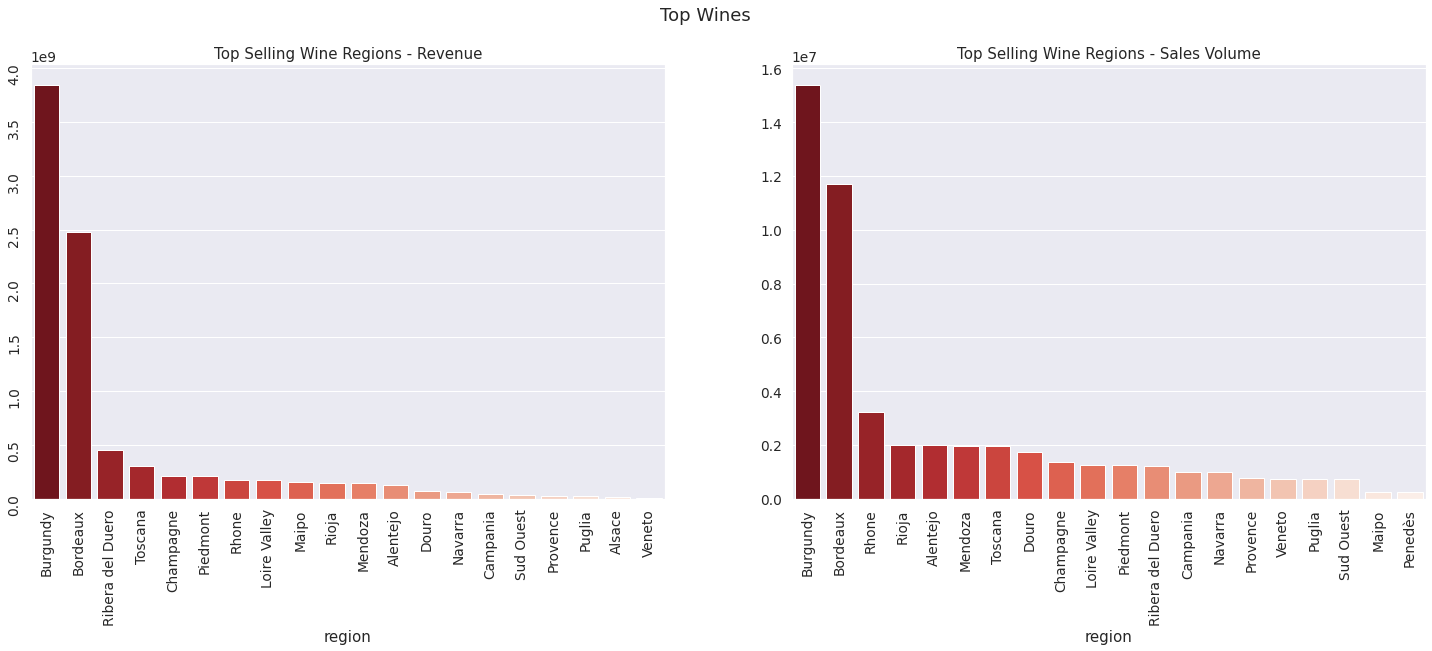

In [100]:
# visualizando os Top Sellers
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (25,8))
fig.suptitle('Top Wines')

#ax[0]
region_rev = df_clean.groupby('region')['amount_spent'].sum().sort_values(ascending=False).iloc[0:20]
sns.barplot(x=region_rev.index, y=region_rev.values,palette="Reds_r", ax=ax[0])
ax[0].tick_params(labelrotation=90)
ax[0].set_title('Top Selling Wine Regions - Revenue')

#ax[1]
region = df_clean.groupby('region')['sales'].sum().sort_values(ascending=False).iloc[0:20]
sns.barplot(x=region.index, y=region.values, palette="Reds_r", ax=ax[1])
plt.xticks(rotation=90)
ax[1].set_title('Top Selling Wine Regions - Sales Volume')

plt.show()

Aqui nós alguns pontos me chamam a atenção:

* Champagne ficar tão atrás no volume de vendas é compensado pela receita que traz.
* Ribera del Duero trazendo bastante receita apesar da baixa oferta e relativamente baixo volume de vendas e oferta.
* Toscana traz uma oportunidade interessante, pois tem oferta e volumes médio mas traz receita melhor que regiões que estão na sua frente. Poderia ser interessante trazer outros vinhos nessa região que demonstra potencial.
* Parecido com a Toscana temos Mendoza, Alentejo e Rioja trazendo bom volume de vendas o que indica um interesse dos clientes nessas regiões e estilos. Pode ser outra oportunidade para mais receita, onde essas regiões estão baixas.

## 4.0 - Previsão de Demanda - Prophet

Agora que já entendemos e exploramos bem nosso conjunto de dados é hora de fazermos as previsões. Para isso, utilizaremos o `Prophet`, que foi desenvolvido pelo Facebook.

O Prophet é bastante robusto, simples e fácil de usar. Vocês vão encontrar na internet exemplos de código utilizando o Prophet sem nem se preoucupar se a Série Temporal é estacionária. Em alguns casos o resultado é bom, mas nem sempre. 

Aqui na Escola de Data Science nós já tivemos aulas extensivas e técnicas sobre o assunto, e por isso não vou me aprofundar, mas vou trazer aqui uma parte do texto do Carlos que trata do assunto:

### Testes Estatísticos e ARIMA
um pré-requisito para que possamos fazer previsões em cima de uma TS é ela ser estacionária.

De maneira simplificada, ser estacionária significa ter a **média, variância e covariância** permanecendo **constante** ao longo da dimensão temporal. Vamos entender visualmente o que isso significa.

<center>
<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2018/09/ns5-e1536673990684.png" width="50%"></center>

No primeiro plot, há uma tendência de alta. Ou seja, a sua média está aumentando conforme o tempo passa. No segundo plot, apesar de não haver uma variação na tendência, a variância (não constante) está interferindo na sua amplitude. Por fim, o último exibe o comportamento típico de quando a covariância varia em função do tempo.

**E como se pareceria uma série estacionária?**

Uma TS com média, variância e covariância constante seria parecida com o plot abaixo.

<center><img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2018/09/ns6-e1536674898419.png" width="20%"></center>

**Como verificar se uma TS é estacionária?**

Há muitas maneiras se fazer essa verificação. Por exemplo:

* **Olhar os plots -** Em muitos casos, durante a análise exploratória você já vai identificar visualmente se uma TS é estacionária ou não.
* **Resumo estatístico -** Você pode gerar um resumo com as principais informações estatísticas da TS, e verificar se há algum indício da estacionaridade.
* **Testes estatísticos -** São testes que possuem a capacidade de nos dizer se uma TS é estacionária ou não, sempre se baseando em métodos científicos.

Nesta projeto, mais pra frente, realizaremos um teste estatístico específico para identificar se nossa TS é estacionária ou não, o teste ***Augmented Dickey Fuller (ADF)***

### Teste ADF

O ADF é um dos testes estatísticos mais usados para TS. Suas hipóteses nula e alternativa são:

* A Hipótese Nula ($H_0$) do teste é que a TS **não é estacionária**. Ou seja, possui algum tipo de dependência em relação ao tempo.
* A Hipótese Alternativa ($H_1$) **rejeita a hipótese nula**, ou seja, que a TS é estacionária.

Vamos ver como isso vai acontecer no nosso projeto específico.


### 4.1 - Preparando os Dados

Primeiro de tudo, precisamos preparar os dados para serem utilizados com o Prophet. Ele precisa de um tipo muito específico de dataframe para funcionar. Precisamos de:

* Data como uma coluna chamada `ds`.
* Vendas como uma coluna chamada `y`.

É isso que vamos fazer abaixo:

In [101]:
# preparando o dataset
df_ts=df_clean.groupby('Date',as_index=False)['sales'].sum()
df_ts['Date'] = pd.to_datetime(df_ts['Date'], format="%Y-%m-%d")
df_ts.index = pd.to_datetime(df_ts['Date'], format="%Y-%m-%d")
df_ts.drop('Date', axis=1, inplace=True)

# nomeando corretamente
df_ts = df_ts.reset_index()
df_ts.columns = ['ds', 'y']
df_ts.head()

,ds,y
0,2018-01-01,43432
1,2018-01-02,43181
2,2018-01-03,43298
3,2018-01-04,42216
4,2018-01-05,42001


### 4.2 - Teste ADF

Diferente de alguns projetos que vemos com o Prophet, vamos fazer o teste para descobrir se nossa série é estacionária. O teste utilizado será o ***Augmented Dickey Fuller (ADF)***.

> Normalmente, rejeitamos $H_0$ quando o *p-value* é menor ou igual a um determinado nível de significância. Normalmente, esse nível de significância é igual a 0.01 (1%), 0.05 (5%) ou até mesmo 0.1 (10%).

> Quanto menor o *p-value*, mais evidências contra a hipótese nula você tem. Por exemplo, caso seja usado $\text{p-value} = 0.05$, rejeitamos a $H_0$ com um nível de confiança de 95%. 

> Caso o valor do teste fique acima do *threshold*, falharemos em rejeitar a hipótese nula. **Atenção, isso não significa que $H_0$ é verdadeira.** Significa apenas que o experimento não encontrou evidências para rejeitá-la.

Vamos ver como a nossa série se sai.

In [102]:
# extraindo os valores
X = df_ts.y

# aplicando o ADF e imprimindo os resultados.
result = adfuller(X)
print('Augmented Dickey–Fuller')
print('Statistical Test: {:.4f}'.format(result[0]))
print('P Value: {:.10f}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
	print('\t{}: {:.4f}'.format(key, value))

Augmented Dickey–Fuller
Statistical Test: -2.3601
P Value: 0.1533303754
Critical Values:
	1%: -3.4365
	5%: -2.8642
	10%: -2.5682


Com um `P Value` de 0.154, poderiamos rejeitar a hipótese nula com um nível de confiança na casa de 85%. Vamos utilizar esse conjunto como está para a nossa baseline, e caso os resultados não sejam bons o suficiente, vamos fazer as transformações.

### 4.3 - Tamanho das previsões

Ao lidar com previsões em Séries Temporais precisamos entender que quanto maior o período que estamos tentando prever, menos confiança teremos nos resultados. Dessa forma, mesmo tendo anos de registros de vendas, vamos fazer as nossas previsões para um período de 30 dias.

In [103]:
# Definindo o tamanho para 30 dias
prediction_size = 30
train_df = df_ts[:-prediction_size]

Agora que temos o nosso conjunto de teste, vamos instanciar e treinar nosso modelo, e fazer nossas previsões.

In [104]:
# instanciando o modelo
b = Prophet()

# treinando o modelo
b.fit(train_df)

# fazendo previsões
future = b.make_future_dataframe(periods=prediction_size)

forecast = b.predict(future)

forecast.head()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,45500.853803,40856.669837,43899.780653,45500.853803,45500.853803,-3084.243800,-3084.243800,-3084.243800,-899.860727,-899.860727,-899.860727,-2184.383074,-2184.383074,-2184.383074,0.0,0.0,0.0,42416.610002
1,2018-01-02,45499.907965,41137.205921,44132.401573,45499.907965,45499.907965,-2801.450481,-2801.450481,-2801.450481,-616.596197,-616.596197,-616.596197,-2184.854283,-2184.854283,-2184.854283,0.0,0.0,0.0,42698.457485
2,2018-01-03,45498.962128,41476.819248,44643.679867,45498.962128,45498.962128,-2462.271822,-2462.271822,-2462.271822,-275.759145,-275.759145,-275.759145,-2186.512677,-2186.512677,-2186.512677,0.0,0.0,0.0,43036.690306
3,2018-01-04,45498.016291,41964.945849,44983.919233,45498.016291,45498.016291,-1982.957626,-1982.957626,-1982.957626,206.208817,206.208817,206.208817,-2189.166443,-2189.166443,-2189.166443,0.0,0.0,0.0,43515.058665
4,2018-01-05,45497.070453,42623.139711,45707.778473,45497.070453,45497.070453,-1341.551500,-1341.551500,-1341.551500,851.042007,851.042007,851.042007,-2192.593507,-2192.593507,-2192.593507,0.0,0.0,0.0,44155.518954


O Prophet traz em seu resultado de previsões diversas informações, entre elas, temos o `yhat`, que são nossas previsões. Além disso temos também os limites inferiores e superiores (`yhat_lower`, `yhat_upper`, respectivamente) entre outras informações que podem ser úteis para um projeto real.

Visualizar as previsões também é super fácil, como podemos ver abaixo:

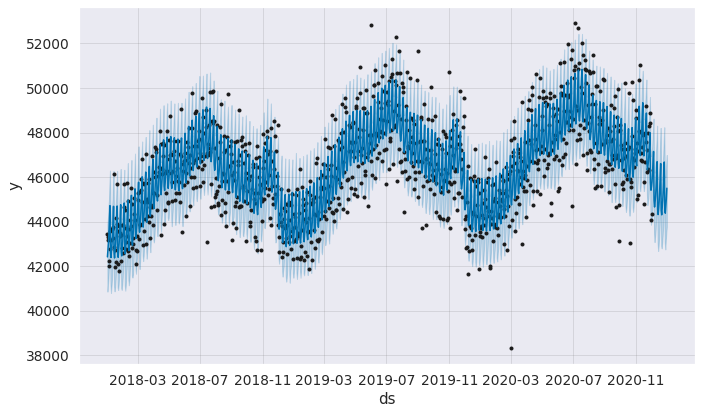

In [105]:
# plotando as previsões
b.plot(forecast).savefig('forecast_non_stationary.png')

Além disso, também podemos plotar os componentes da nossa previsão.

Abaixo, podemos ver:

* Tendência Geral
* Tendência Semanal
* Tendência Anual

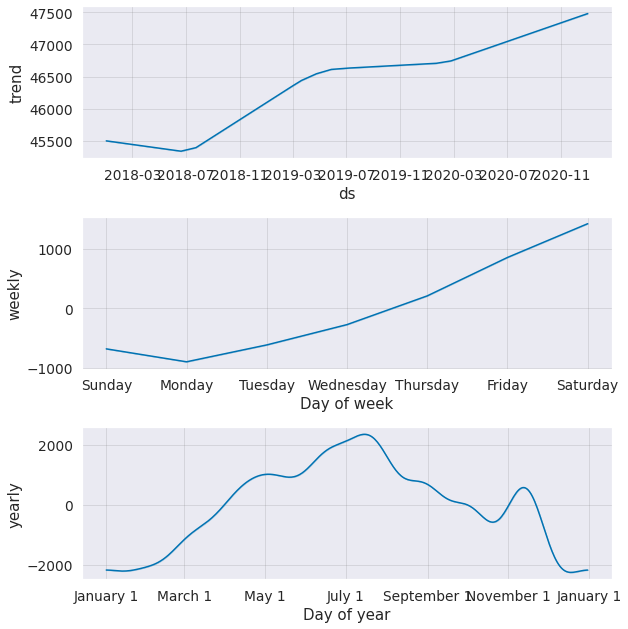

In [106]:
# plotando componentes
b.plot_components(forecast).savefig('non_st_components.png')

## 5.0 - Conclusões

### 5.1 - Série Não-Estacionária

Tudo isso parece lindo e perfeito, mas como saber se nossas previsões estão boas de verdade?

Para isso utilizaremos as seguintes métricas:

* Mean Absolute Percentage Error - Mostra quanto as nossas previsões diferem do valor real em porcentagem.
* Mean Absolute Error - Valor absoluto do nosso erro na previsão em relação à série real.

Abaixo temos uma função para calcular o MAPE e MAE da nossa série.

In [107]:
# definindo a função
def make_comparison_dataframe(historical, forecast):
  return forecast.set_index('ds')[['yhat', 'yhat_lower',
                                'yhat_upper']].join(historical.set_index('ds'))
cmp_df = make_comparison_dataframe(df_ts, forecast)

def calculate_forecast_errors(df_ts, prediction_size):

  df = df_ts.copy()
  df['e'] = df['y'] - df['yhat']
  df['p'] = 100 * df['e'] / df['y']
  predicted_part = df[-prediction_size:]

  error_mean = lambda error_name: np.mean(np.abs(predicted_part[error_name]))

  return{'MAPE': error_mean('p'), 'MAE': error_mean('e')}

# imprimindo o MAPE e MAE
for err_name, err_value in calculate_forecast_errors(cmp_df, prediction_size).items():
  print(err_name, err_value)

MAPE 2.254276702075232
MAE 1002.5887764117896


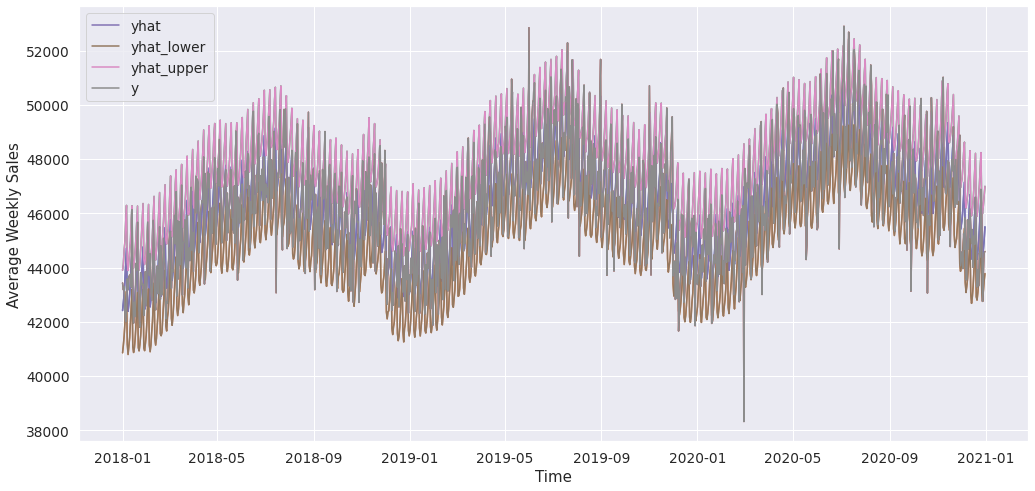

In [108]:
# visualizando os resultados
fig, ax = plt.subplots(figsize=(17,8))

plt.plot(cmp_df['yhat'])
plt.plot(cmp_df['yhat_lower'])
plt.plot(cmp_df['yhat_upper'])
plt.plot(cmp_df['y'])

plt.xlabel('Time')
plt.ylabel('Average Weekly Sales')
ax.plot(cmp_df['yhat'], label='yhat')
ax.plot(cmp_df['yhat_lower'], label='yhat_lower')
ax.plot(cmp_df['yhat_upper'], label='yhat_upper')
ax.plot(cmp_df['y'], label='y')
ax.legend()
plt.savefig('non_st_yhat.png')
plt.show()

Esses resultados podem parecer bons, mas estamos tendo um erro absoluto grande dentro do contexto que estamos lidando.

Esse modelo vai servir bem como baseline. Agora, vamos transformar a série em estacionária e rodar novamente!

### 5.2 - Série Estacionária

Mais uma vez, não vou ser exaustivo nesse ponto que já abordamos, mas vou trazer o passo a passo trazido pelo Carlos para transformamos a série em estacionária.

> Para transformar uma TS em estacionária, precisamos remover a tendência e a sazonalidade que há nos dados originais. Para isso, existem diversas técnicas que podem ser usadas.

> Uma bom começo é aplicar o $log$ a fim de reduzirmos a magnitude dos valores da TS. Na sequência, subtraímos a média móvel de um determinado período em relação ao $log$ da TS.

In [109]:
# preparando os dados
df_ts.index = pd.to_datetime(df_ts['ds'], format="%Y-%m-%d")
df_ts.drop('ds', axis=1, inplace=True)
df_ts.head()

,y
ds,
2018-01-01,43432
2018-01-02,43181
2018-01-03,43298
2018-01-04,42216
2018-01-05,42001


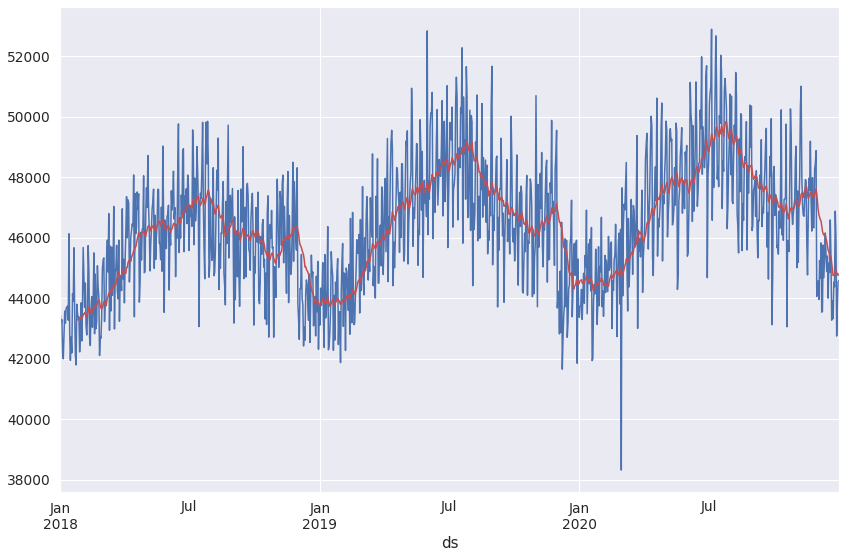

In [110]:
# checando o plot original
ma = df_ts.rolling(24).mean()

fig, ax = plt.subplots(figsize=(12,8))
df_ts.plot(ax=ax, legend=False)
ma.plot(ax=ax, color='r', legend=False)
plt.tight_layout();

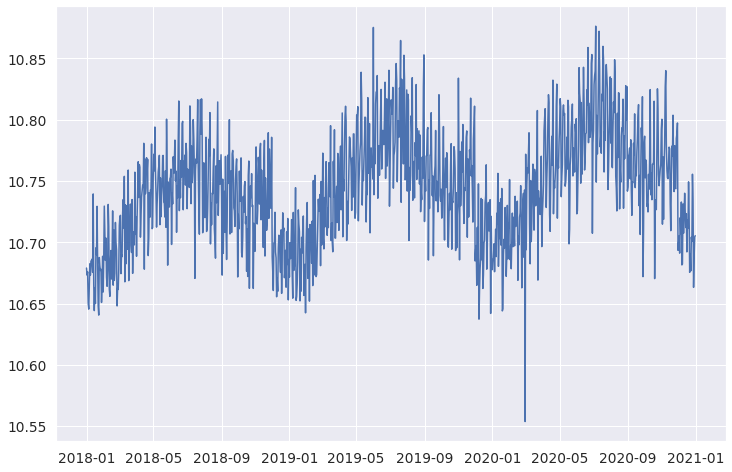

In [111]:
# aplicando o log
fig, ax = plt.subplots(figsize=(12,8))
ts_log = np.log(df_ts)
plt.plot(ts_log);

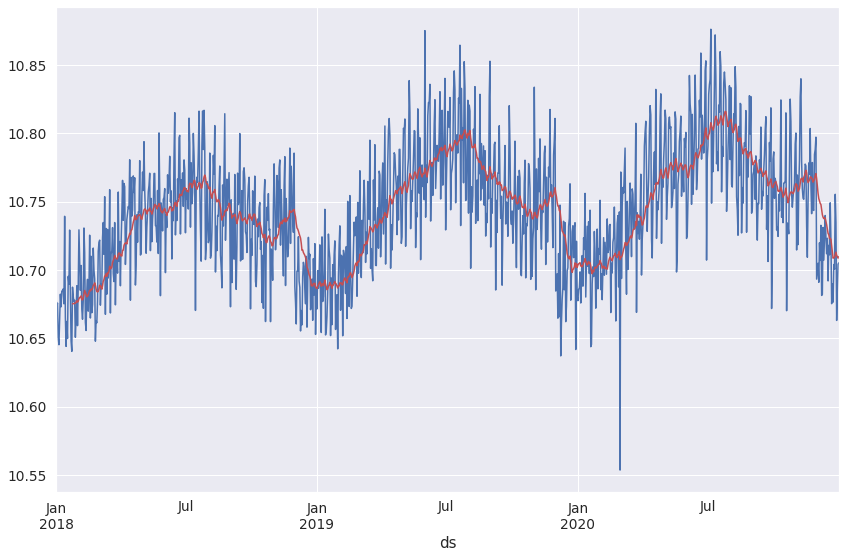

In [112]:
# aplicando o log
df_log = np.log(df_ts)
ma_log = df_log.rolling(24).mean()

fig, ax = plt.subplots(figsize=(12,8))
df_log.plot(ax=ax, legend=False)
ma_log.plot(ax=ax, color='r', legend=False)
plt.tight_layout()

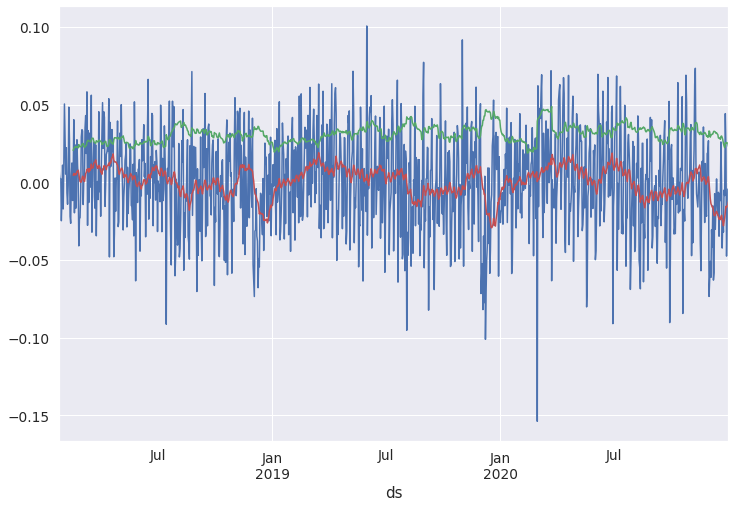

In [113]:
# subtraindo a média do log nos dados
df_sub = (df_log - ma_log).dropna()
ma_sub = df_sub.rolling(24).mean()
std_sub = df_sub.rolling(24).std()

fig, ax = plt.subplots(figsize=(12,8))
df_sub.plot(ax=ax, legend=False)
ma_sub.plot(ax=ax, color='r', legend=False)
std_sub.plot(ax=ax, color='g', legend=False)
plt.show();

In [114]:
# repetindo o ADF
X_sub = df_sub.y.values

# aplicando o ADF e imprimindo os resultados
result_sub = adfuller(X_sub)
print('Augmented Dickey–Fuller')
print('Statistical Test: {:.4f}'.format(result_sub[0]))
print('P Value: {:.10f}'.format(result_sub[1]))
print('Critical Values:')
for key, value in result_sub[4].items():
	print('\t{}: {:.4f}'.format(key, value))

Augmented Dickey–Fuller
Statistical Test: -5.6436
P Value: 0.0000010231
Critical Values:
	1%: -3.4366
	5%: -2.8643
	10%: -2.5682


Bingo!

Agora temos uma comprovação com nível de confiança bem mais alto para considerar a nossa série estacionária.

Existe outra técnica que podemos utilizar para potencializar esses resultados que é a diferenciação.

Uma outra técnica simples que ajuda a tornar TS mais estacionárias é a diferenciação.

Apenas calculando a diferença entre duas observações possíveis, é possível incrementar ainda mais o desempenho no ADF.

$$value(t) = observation(t) - observation(t -1)$$

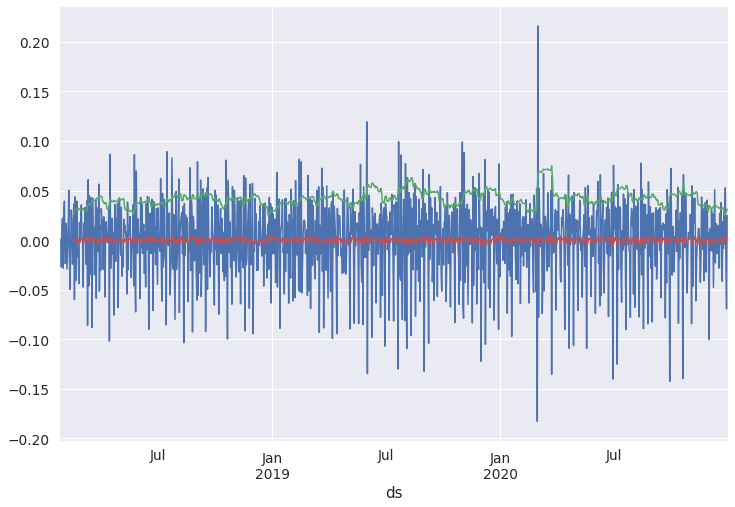

Augmented Dickey–Fuller
Statistical Test: -5.6436
P Value: 0.0000010231
Critical Values:
	1%: -3.4366
	5%: -2.8643
	10%: -2.5682


In [115]:
# aplicando a diferenciação
df_diff = df_sub.diff(1)
ma_diff = df_diff.rolling(24).mean()
std_diff = df_diff.rolling(24).std()

fig, ax = plt.subplots(figsize=(12,8))
df_diff.plot(ax=ax, legend=False)
ma_diff.plot(ax=ax, color='r', legend=False)
std_diff.plot(ax=ax, color='g', legend=False)
plt.show()

# extraindo os valores
X_diff = df_diff.y.dropna().values

# aplicando o ADF e imprimindo os resultados 
result_diff = adfuller(X_diff)
print('Augmented Dickey–Fuller')
print('Statistical Test: {:.4f}'.format(result_sub[0]))
print('P Value: {:.10f}'.format(result_sub[1]))
print('Critical Values:')
for key, value in result_sub[4].items():
	print('\t{}: {:.4f}'.format(key, value))

No nosso caso, não tivemos modificações, mas achei interessante trazer novamente

O primeiro passo é retomar o formato que o Prophet precisa.

In [116]:
# transformando no formato do Prophet
df_log.reset_index(inplace=True)

In [117]:
# definindo o tamanho da previsão
prediction_size = 30
train_df = df_log[:-prediction_size]

In [118]:
# instanciando o modelo
m = Prophet()

# treinando o modelo
m.fit(train_df)

# fazer previsões
future = m.make_future_dataframe(periods=prediction_size)

forecast = m.predict(future)

forecast.head()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,10.727495,10.627511,10.692372,10.727495,10.727495,-0.068241,-0.068241,-0.068241,-0.019148,-0.019148,-0.019148,-0.049093,-0.049093,-0.049093,0.0,0.0,0.0,10.659254
1,2018-01-02,10.727461,10.632350,10.699693,10.727461,10.727461,-0.062159,-0.062159,-0.062159,-0.012997,-0.012997,-0.012997,-0.049161,-0.049161,-0.049161,0.0,0.0,0.0,10.665302
2,2018-01-03,10.727426,10.638990,10.705475,10.727426,10.727426,-0.054852,-0.054852,-0.054852,-0.005592,-0.005592,-0.005592,-0.049260,-0.049260,-0.049260,0.0,0.0,0.0,10.672574
3,2018-01-04,10.727392,10.651425,10.715849,10.727392,10.727392,-0.044598,-0.044598,-0.044598,0.004785,0.004785,0.004785,-0.049383,-0.049383,-0.049383,0.0,0.0,0.0,10.682794
4,2018-01-05,10.727358,10.665792,10.729117,10.727358,10.727358,-0.031253,-0.031253,-0.031253,0.018272,0.018272,0.018272,-0.049525,-0.049525,-0.049525,0.0,0.0,0.0,10.696104


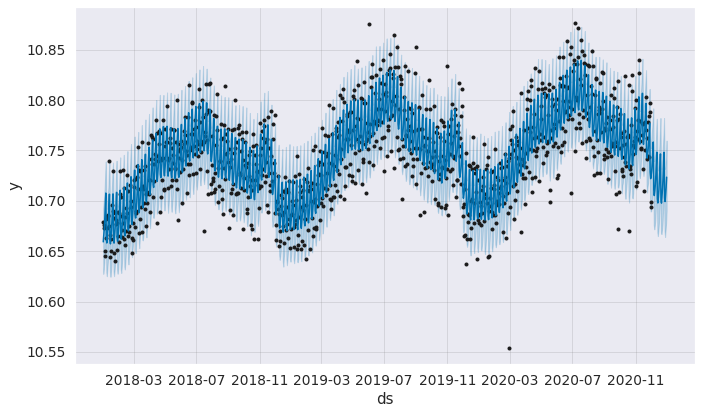

In [119]:
# plotando a previsão
m.plot(forecast).savefig('st_forecast.png')

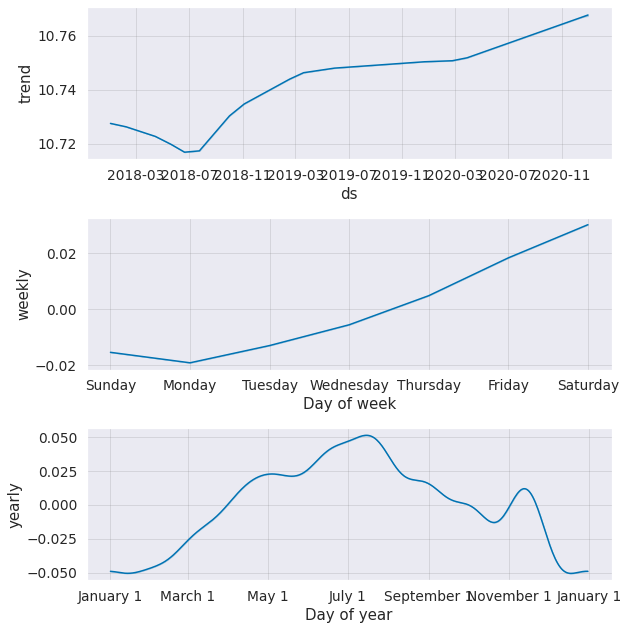

In [120]:
# plotando os componentes
m.plot_components(forecast).savefig('st_components.png')

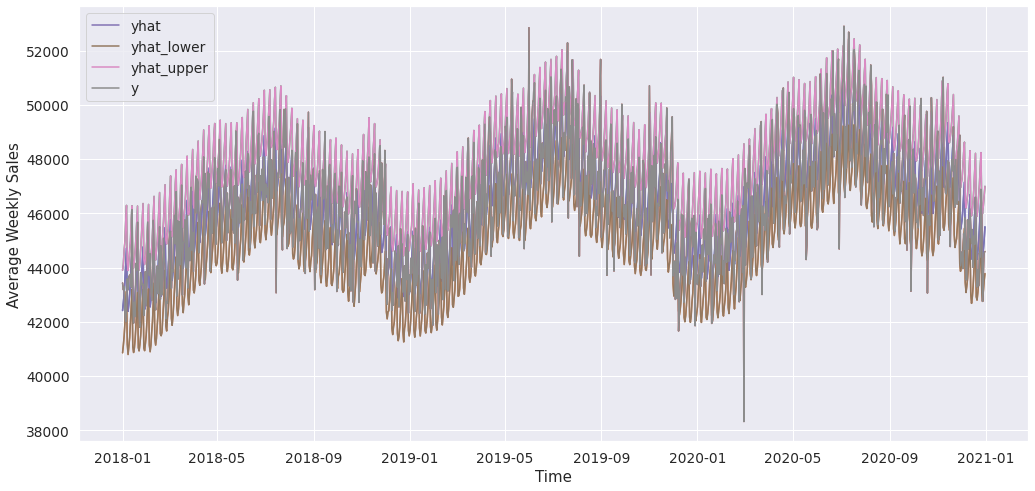

In [121]:
# checando os resultados
fig, ax = plt.subplots(figsize=(17,8))

plt.plot(cmp_df['yhat'])
plt.plot(cmp_df['yhat_lower'])
plt.plot(cmp_df['yhat_upper'])
plt.plot(cmp_df['y'])

plt.xlabel('Time')
plt.ylabel('Average Weekly Sales')
ax.plot(cmp_df['yhat'], label='yhat')
ax.plot(cmp_df['yhat_lower'], label='yhat_lower')
ax.plot(cmp_df['yhat_upper'], label='yhat_upper')
ax.plot(cmp_df['y'], label='y')
ax.legend()
plt.show()

In [122]:
# reutilizando a função
def make_comparison_dataframe(historical, forecast):
  return forecast.set_index('ds')[['yhat', 'yhat_lower',
                                'yhat_upper']].join(historical.set_index('ds'))
cmp_df = make_comparison_dataframe(df_log, forecast)

# calculando MAPE e MAE
def calculate_forecast_errors(df_ts, prediction_size):

  df = df_ts.copy()
  df['e'] = df['y'] - df['yhat']
  df['p'] = 100 * df['e'] / df['y']
  predicted_part = df[-prediction_size:]

  error_mean = lambda error_name: np.mean(np.abs(predicted_part[error_name]))

  return{'MAPE': error_mean('p'), 'MAE': error_mean('e')}
  
for err_name, err_value in calculate_forecast_errors(cmp_df, prediction_size).items():
  print(err_name, err_value)

MAPE 0.20188586841484438
MAE 0.021608799725004544


Agora sim, temos um resultado bastante convincente!

Com erro bastante baixo, temos resultados muito bons para apresentar! Só temos um detalhe pra consertar.

Ao fazer a transformação para a série não estacionária nós colocamos os dados em uma outra escala, e precisamos trazê-los para valores condizentes com o data set original.

Como nós fizemos uma transformação com log, vamos trazer de volta com uma transformação de exponencial.

In [123]:
# criando um dataset completo
df_final = forecast[['ds', 'yhat']]
df_final.head()

,ds,yhat
0,2018-01-01,10.659254
1,2018-01-02,10.665302
2,2018-01-03,10.672574
3,2018-01-04,10.682794
4,2018-01-05,10.696104


In [124]:
# visualizando as previsões dentro de um dataframe
df_final['AmountSpentLog'] = df_log['y']
df_final.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ds,yhat,AmountSpentLog
0,2018-01-01,10.659254,10.678952
1,2018-01-02,10.665302,10.673156
2,2018-01-03,10.672574,10.675862
3,2018-01-04,10.682794,10.650555
4,2018-01-05,10.696104,10.645449


Agora vamos criar um dataset que contenha:

* Data (`ds`)
* Previsão do Prophet (`yhat`)
* Valor Gasto Real (`AmountSpent`)
* Valor Gasto Previsto na escala correta (`AmountSpentPred`)

In [125]:
# getting the values back to their original scale
df_final['AmountSpent'] = np.exp(df_final['AmountSpentLog'].values)
df_final['AmountSpentPred'] = np.exp(df_final['yhat'].values)
df_final.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ds,yhat,AmountSpentLog,AmountSpent,AmountSpentPred
0,2018-01-01,10.659254,10.678952,43432.0,42584.857172
1,2018-01-02,10.665302,10.673156,43181.0,42843.185578
2,2018-01-03,10.672574,10.675862,43298.0,43155.888128
3,2018-01-04,10.682794,10.650555,42216.0,43599.210045
4,2018-01-05,10.696104,10.645449,42001.0,44183.393595
5,2018-01-06,10.707738,10.663522,42767.0,44700.416922
6,2018-01-07,10.662038,10.682400,43582.0,42703.566160
7,2018-01-08,10.658111,10.673179,43182.0,42536.194385
8,2018-01-09,10.664078,10.684646,43680.0,42790.764917
9,2018-01-10,10.671313,10.684783,43686.0,43101.510807


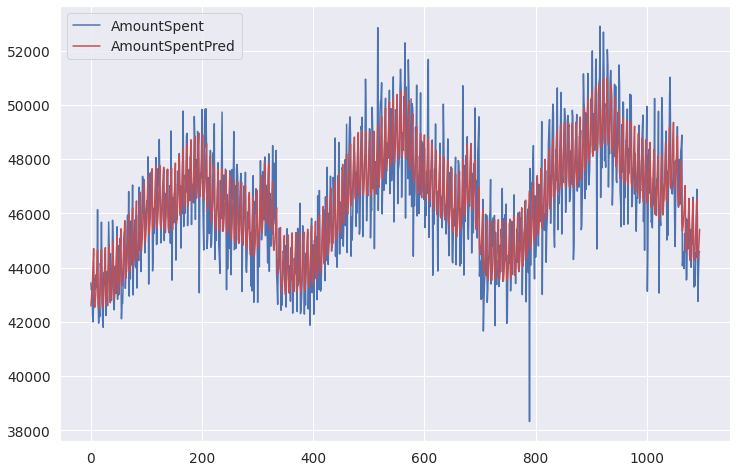

In [126]:
# plotting predictions vs reality
fig, ax = plt.subplots(figsize=(12,8))
df_final['AmountSpent'].plot(ax=ax, legend=('Amount Spent'))
df_final['AmountSpentPred'].plot(ax=ax, color='r', legend={'Predicted'})
plt.savefig('st_yhat.png')
plt.show()

Aqui podemos ver que o nosso modelo está mais próximo dos limites superiores que dos inferiores, mas em geral, em um ponto médio.

Para visualizar previsões mais otimistas, poderíamos considerar o `yhat_upper`, e para previsões mais pessimistas, o `yhat_lower`.